# DCGAN — Bug-Fix Labs - 10 Bugs

In [1]:
import torch, torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# ---------------------------
# Data
# ---------------------------
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
ds = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
loader = DataLoader(ds, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)

100%|██████████| 170M/170M [00:17<00:00, 9.92MB/s]


In [3]:
# ---------------------------
# Hyperparams
# ---------------------------
z_dim = 100
g_lr  = 2e-4
d_lr  = 2e-4

In [4]:
# ---------------------------
# Models
# ---------------------------
class D(nn.Module):
    def __init__(self, ch=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, ch,   4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ch, ch*2, 4, 2, 1),
            nn.BatchNorm2d(ch*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ch*2, ch*4, 4, 2, 1),
            nn.BatchNorm2d(ch*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ch*4, 1,    4, 1, 0),

        )
    def forward(self, x):
        return self.net(x).view(x.size(0))

class G(nn.Module):
    def __init__(self, z=100, ch=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z,   ch*4, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ch*4), nn.ReLU(True),
            nn.ConvTranspose2d(ch*4, ch*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ch*2), nn.ReLU(True),
            nn.ConvTranspose2d(ch*2, ch,   4, 2, 1, bias=False),
            nn.BatchNorm2d(ch),   nn.ReLU(True),
            nn.ConvTranspose2d(ch,  3,     4, 2, 1, bias=False),
            nn.Tanh()

        )
    def forward(self, z):
        #z = z.view(z.size(0), 64, 1, 1)
        return self.net(z)

Dnet = D().to(device)
Gnet = G(z_dim).to(device)

In [5]:
# ---------------------------
# Loss & Optimizers
# ---------------------------
crit = nn.BCEWithLogitsLoss()             # using logits loss → D must NOT have Sigmoid
opt_d = torch.optim.Adam(Dnet.parameters(), lr=d_lr, betas=(0.9, 0.999))
opt_g = torch.optim.Adam(Gnet.parameters(), lr=g_lr,  betas=(0.9, 0.999))

In [6]:
# ---------------------------
# Training (intentionally wrong)
# ---------------------------
from tqdm import tqdm

num_epochs = 20
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    for real, _ in tqdm(loader):
      real = real.to(device)
      b = real.size(0)

    # ---- Discriminator step ----
      Dnet.zero_grad()

      real_loss = crit(Dnet(real), torch.ones(b, device=device))

      z = torch.randn(b, z_dim,1,1, device=device)
      fake = Gnet(z).detach()


      fake_loss = crit(Dnet(fake), torch.zeros (b, device=device))
      loss_d = real_loss + fake_loss

      loss_d.backward()
      opt_d.step()

    # ---- Generator step ----
      z = torch.randn(b, z_dim,1,1, device=device)
      fake = Gnet(z)


      loss_g = crit(Dnet(fake), torch.ones(b, device=device))
      Gnet.zero_grad()
      loss_g.backward()
      opt_g.step()




print("Your task: fix all 10 bugs until training runs and samples look reasonable.")

Epoch 1/20


100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Epoch 2/20


100%|██████████| 391/391 [00:15<00:00, 25.03it/s]


Epoch 3/20


100%|██████████| 391/391 [00:15<00:00, 25.08it/s]


Epoch 4/20


100%|██████████| 391/391 [00:16<00:00, 23.68it/s]


Epoch 5/20


100%|██████████| 391/391 [00:17<00:00, 22.06it/s]


Epoch 6/20


100%|██████████| 391/391 [00:16<00:00, 23.87it/s]


Epoch 7/20


100%|██████████| 391/391 [00:17<00:00, 22.49it/s]


Epoch 8/20


100%|██████████| 391/391 [00:15<00:00, 24.55it/s]


Epoch 9/20


100%|██████████| 391/391 [00:16<00:00, 24.13it/s]


Epoch 10/20


100%|██████████| 391/391 [00:16<00:00, 24.43it/s]


Epoch 11/20


100%|██████████| 391/391 [00:16<00:00, 23.16it/s]


Epoch 12/20


100%|██████████| 391/391 [00:16<00:00, 23.12it/s]


Epoch 13/20


100%|██████████| 391/391 [00:15<00:00, 24.75it/s]


Epoch 14/20


100%|██████████| 391/391 [00:15<00:00, 24.60it/s]


Epoch 15/20


100%|██████████| 391/391 [00:16<00:00, 23.61it/s]


Epoch 16/20


100%|██████████| 391/391 [00:15<00:00, 24.66it/s]


Epoch 17/20


100%|██████████| 391/391 [00:15<00:00, 24.95it/s]


Epoch 18/20


100%|██████████| 391/391 [00:15<00:00, 24.62it/s]


Epoch 19/20


100%|██████████| 391/391 [00:16<00:00, 23.34it/s]


Epoch 20/20


100%|██████████| 391/391 [00:15<00:00, 24.76it/s]

Your task: fix all 10 bugs until training runs and samples look reasonable.


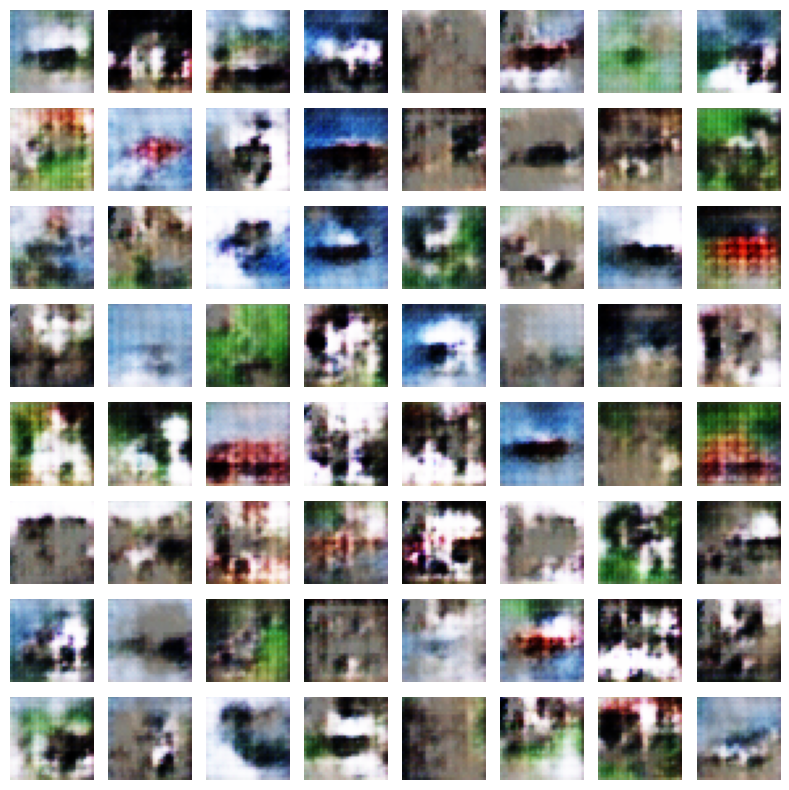

In [7]:

import matplotlib.pyplot as plt
import numpy as np

Gnet.eval()
with torch.no_grad():
    fixed_noise = torch.randn(64, z_dim, 1, 1, device=device)
    fake_images = Gnet(fixed_noise).cpu()


fake_images = fake_images * 0.5 + 0.5


fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.transpose(fake_images[i], (1, 2, 0)))
    ax.axis('off')
plt.tight_layout()
plt.show()